# 1. Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Collecting the DataSet

In [3]:
df=pd.read_csv('Train.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [4]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
df.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


In [6]:
df.shape

(10999, 12)

# 3. Data Pre-Processing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


# 3.1 Handling NULL values

In [9]:
df.isnull().any()

ID                     False
Warehouse_block        False
Mode_of_Shipment       False
Customer_care_calls    False
Customer_rating        False
Cost_of_the_Product    False
Prior_purchases        False
Product_importance     False
Gender                 False
Discount_offered       False
Weight_in_gms          False
Reached.on.Time_Y.N    False
dtype: bool

In [10]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Inference: There are no null values found.

# 3.2 Handling Categorical Data

In [11]:
label_map={}
for i in df.columns:
    if str(df[i].dtype)=='object':
        temp={}
        cats=df[i].unique()
        for index in range(len(cats)):
            temp[cats[index]]=index
        label_map[i]=temp
        df[i]=df[i].map(temp)
label_map

{'Warehouse_block': {'D': 0, 'F': 1, 'A': 2, 'B': 3, 'C': 4},
 'Mode_of_Shipment': {'Flight': 0, 'Ship': 1, 'Road': 2},
 'Product_importance': {'low': 0, 'medium': 1, 'high': 2},
 'Gender': {'F': 0, 'M': 1}}

# 3.3 Outlier Detection

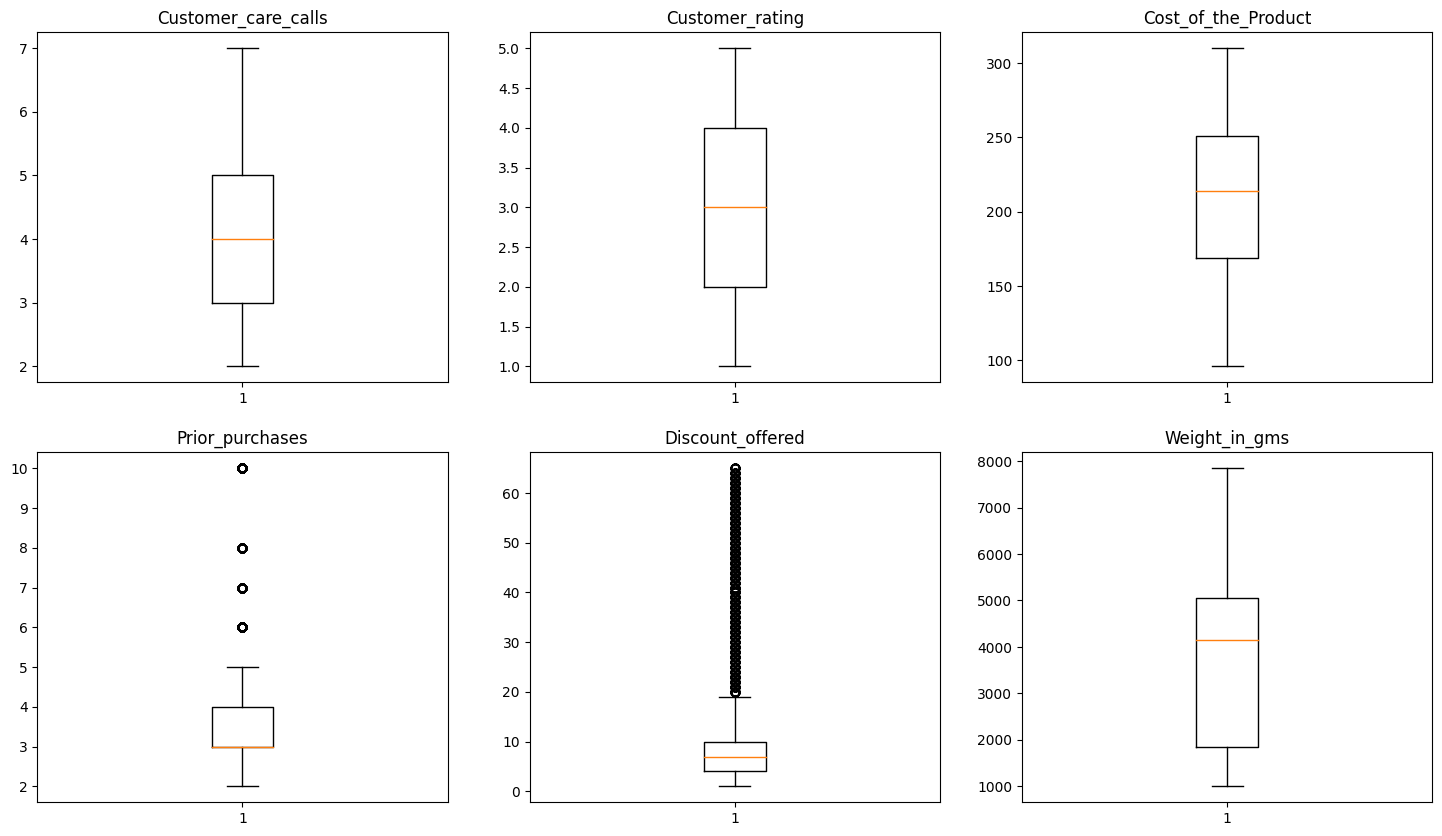

In [12]:
c=0
plt.figure(figsize=(18,10))
for i in df.drop(columns=['Warehouse_block','Mode_of_Shipment',
                          'Product_importance','Gender','Reached.on.Time_Y.N',
                          'ID']).columns:
    if str(df[i].dtype)=='object':
        continue
    plt.subplot(2,3,c+1)
    plt.boxplot(df[i])
    plt.title(i)
    c+=1
plt.show()

In [13]:
def check_outliers(arr):
    Q1=np.percentile(arr,25,interpolation='midpoint')
    Q3=np.percentile(arr,75,interpolation='midpoint')
    IQR=Q3-Q1

    upper=Q3+(1.5*IQR)
    upper_array=np.array(arr>=upper)
    print(''*3,len(upper_array[upper_array==True]),'are over the upper bound:',upper)

    lower=Q1-(1.5*IQR)
    lower_array=np.array(arr<=lower)
    print(''*3,len(lower_array[lower_array==True]),'are lessthan the lower bound:',lower,'\n')

for i in df.drop(columns=['Warehouse_block','Mode_of_Shipment',
                          'Product_importance','Gender','Reached.on.Time_Y.N',
                          'ID']).columns:
    if str(df[i].dtype)=='object':
        continue
    print(i)
    check_outliers(df[i])

Customer_care_calls
 0 are over the upper bound: 8.0
 0 are lessthan the lower bound: 0.0 

Customer_rating
 0 are over the upper bound: 7.0
 0 are lessthan the lower bound: -1.0 

Cost_of_the_Product
 0 are over the upper bound: 374.0
 0 are lessthan the lower bound: 46.0 

Prior_purchases
 1003 are over the upper bound: 5.5
 0 are lessthan the lower bound: 1.5 

Discount_offered
 2262 are over the upper bound: 19.0
 0 are lessthan the lower bound: -5.0 

Weight_in_gms
 0 are over the upper bound: 9865.75
 0 are lessthan the lower bound: -2976.25 



<ipython-input-13-ae39f8601d1c>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(arr,25,interpolation='midpoint')
<ipython-input-13-ae39f8601d1c>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3=np.percentile(arr,75,interpolation='midpoint')


# 4. Splitting into data into training and testing

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['ID','Reached.on.Time_Y.N']),
                                              df['Reached.on.Time_Y.N'],
                                              test_size=0.2,
                                              random_state=1234,
                                              shuffle=True)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8799, 10), (2200, 10), (8799,), (2200,))

# 5. Data Visualization

<Axes: >

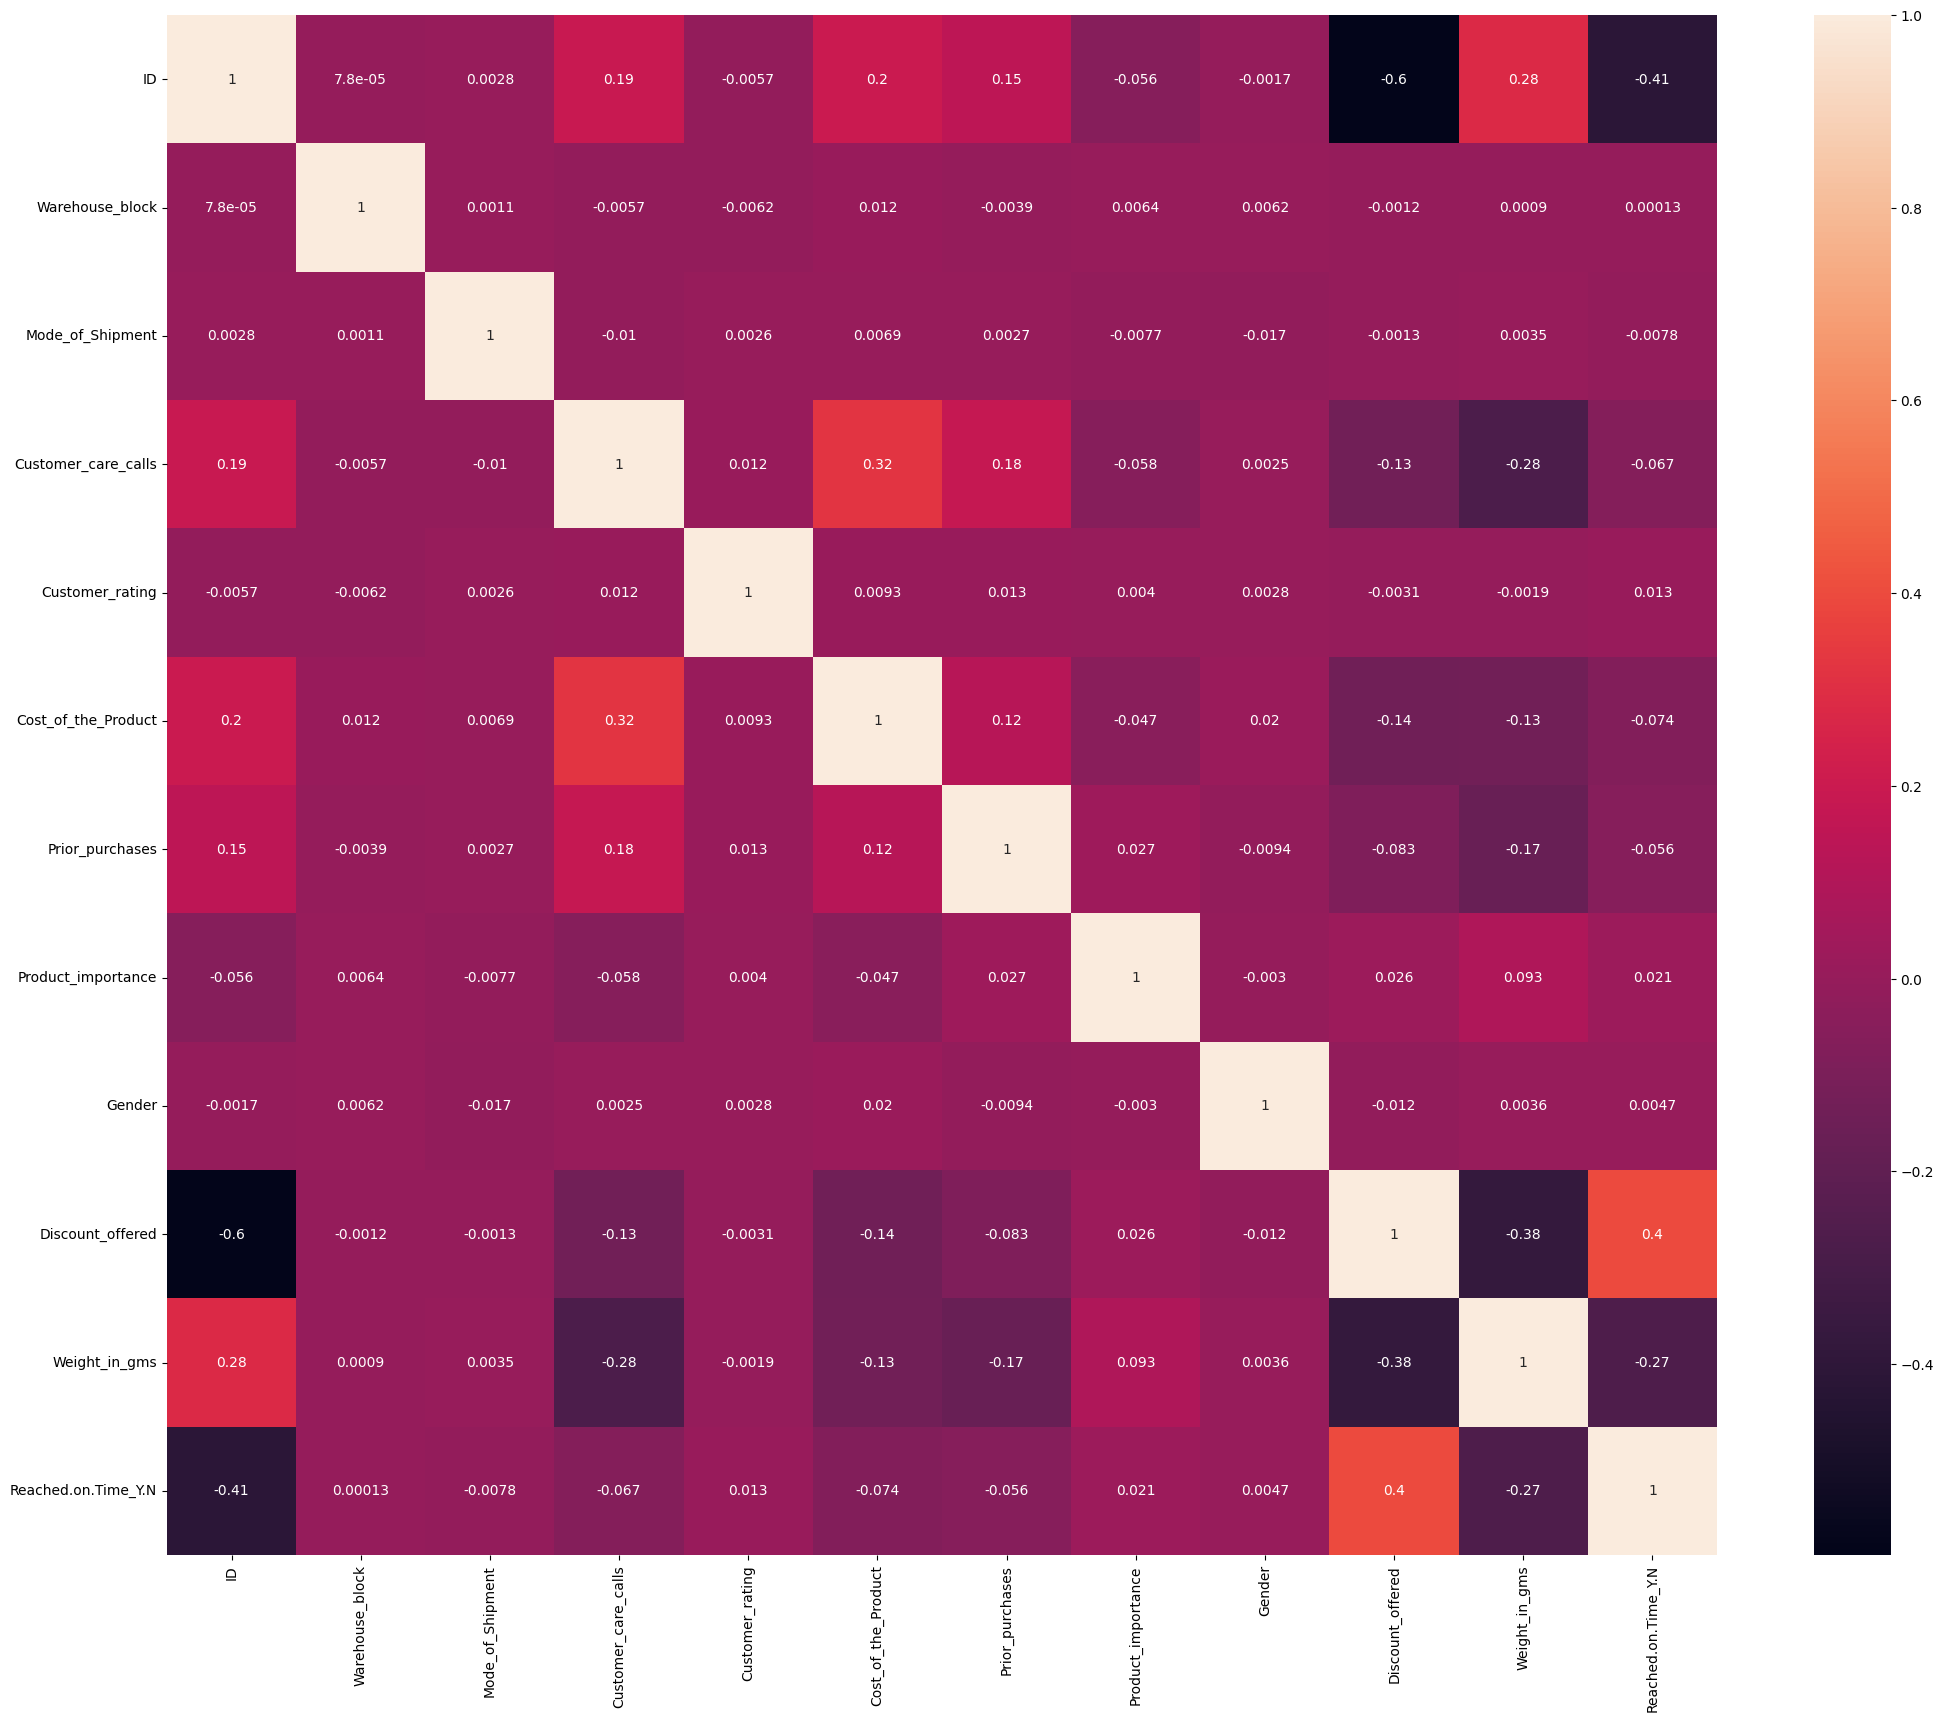

In [15]:
corr=df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corr,annot=True)

# 6. Model Building

In [18]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
def models_eval_mm(x_train,y_train,x_test,y_test):
    lg=LogisticRegression(random_state=1234)
    lg.fit(x_train,y_train)
    print('--Logistic Regression--')
    print('Train Score:',lg.score(x_train,y_train))
    print('Test Score:',lg.score(x_test,y_test))
    print()

    lgcv=LogisticRegressionCV(random_state=1234)
    lgcv.fit(x_train,y_train)
    print('--Logistic Regression CV--')
    print('Train Score:',lgcv.score(x_train,y_train))
    print('Test Score:',lgcv.score(x_test,y_test))
    print()

    xgb=XGBClassifier(random_state=1234)
    xgb.fit(x_train,y_train)
    print('--XGBoost--')
    print('Train Score:',xgb.score(x_train,y_train))
    print('Test Score:',xgb.score(x_test,y_test))
    print()

    rg=RidgeClassifier(random_state=1234)
    rg.fit(x_train,y_train)
    print('--Ridge Classifier--')
    print('Train Score:',rg.score(x_train,y_train))
    print('Test Score:',rg.score(x_test,y_test))
    print()

    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    print('--KNN--')
    print('Train Score:',knn.score(x_train,y_train))
    print('Test Score:',knn.score(x_test,y_test))
    print()

    rf=RandomForestClassifier(random_state=1234)
    rf.fit(x_train,y_train)
    print('--Random Forest--')
    print('Train Score:',rf.score(x_train,y_train))
    print('Test Score:',rf.score(x_test,y_test))
    print()

    svc=svm.SVC(random_state=1234)
    svc.fit(x_train,y_train)
    print('--SVM Classifier--')
    print('Train Score:',svc.score(x_train,y_train))
    print('Test Score:',svc.score(x_test,y_test))
    print()

    return lg,lgcv,xgb,rg,knn,rf,svc

# 6.1 Normalization

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train_normalized = sc.fit_transform(x_train)
x_test_normalized = sc.transform(x_test)

In [20]:
lg,lgcv,xgb,rg,knn,rf,svc=models_eval_mm(x_train_normalized,y_train,x_test_normalized,y_test)

--Logistic Regression--
Train Score: 0.6403000340947835
Test Score: 0.6427272727272727

--Logistic Regression CV--
Train Score: 0.6412092283214001
Test Score: 0.6381818181818182

--XGBoost--
Train Score: 0.9060120468235027
Test Score: 0.64

--Ridge Classifier--
Train Score: 0.6504148198658939
Test Score: 0.6522727272727272

--KNN--
Train Score: 0.7782702579838618
Test Score: 0.6286363636363637

--Random Forest--
Train Score: 1.0
Test Score: 0.6559090909090909

--SVM Classifier--
Train Score: 0.7041709285146039
Test Score: 0.6709090909090909



# 6.2 Testing the modal

In [21]:
print('--Logistic Regression--')
lg.predict(x_test_normalized[0].reshape(1,-1))

--Logistic Regression--


array([1])

In [22]:
print('--Logistic Regression CV--')
lgcv.predict(x_test_normalized[0].reshape(1,-1))

--Logistic Regression CV--


array([1])

In [23]:
print('--XGBoost--')
xgb.predict(x_test_normalized[0].reshape(1,-1))

--XGBoost--


array([1])

In [24]:
print('--Ridge Classifier--')
rg.predict(x_test_normalized[0].reshape(1,-1))

--Ridge Classifier--


array([1])

In [25]:
print('--KNN--')
knn.predict(x_test_normalized[0].reshape(1,-1))

--KNN--


array([0])

In [26]:
print('--Random Forest--')
rf.predict(x_test_normalized[0].reshape(1,-1))

--Random Forest--


array([0])

In [27]:
print('--SVM Classifier--')
svc.predict(x_test_normalized[0].reshape(1,-1))

--SVM Classifier--


array([0])

# 7. Performance Testing & Hyperparameter Tuning

### 7.1 Compare The Model

In [28]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
def eval(name,model):
    y_pred = model.predict(x_test_normalized)
    result=[]
    result.append(name)
    result.append("{:.2f}".format(accuracy_score(y_test,y_pred)*100))
    result.append("{:.2f}".format(f1_score(y_test,y_pred)*100))
    result.append("{:.2f}".format(recall_score(y_test,y_pred)*100))
    result.append("{:.2f}".format(precision_score(y_test,y_pred)*100))
    return result

model_list={
    'logistic regression':lg,
    'logistic regressio cv':lgcv,
    'XGboost':xgb,
    'Ridge Classifier':rg,
    'KNN':knn,
    'Random Forest':rf,
    'Support Vector Machine':svc
}
model_eval_info=[]
for i in model_list.keys():
    model_eval_info.append(eval(i,model_list[i]))
model_eval_info=pd.DataFrame(model_eval_info,columns=['Name','Accuracy','f1_score','Recall','Precision'])
model_eval_info.to_csv('model_eval.csv')
model_eval_info

,Name,Accuracy,f1_score,Recall,Precision
0,logistic regression,64.27,69.22,67.79,70.72
1,logistic regressio cv,63.82,69.10,68.25,69.97
2,XGboost,64.00,68.55,66.18,71.09
3,Ridge Classifier,65.23,70.45,69.94,70.97
4,KNN,62.86,68.17,67.10,69.28
5,Random Forest,65.59,68.65,63.57,74.62
6,Support Vector Machine,67.09,67.12,56.67,82.29


### 7.2 Comparing model accuracy befor & after applying hyperparameter tuning

#### XGBoost

In [29]:
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 1234,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

#### Random Forest

In [30]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

#### Logistic Regression

In [31]:
lgcv.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1234,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

#### Hyperparameter optimization for XGBoost

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
params={
    'min_child_weight':[10,20],
    'gamma':[1.5,2.0,2.5],
    'colsample_bytree':[0.6,0.8,0.9],
    'max_depth':[4,5,6]
}
xgb=XGBClassifier(learning_rate=0.5,n_estimators=100,objective='binary:logistic',nthread=3)
fitmodel=RandomizedSearchCV(xgb,param_distributions=params,n_iter=10,cv=5,scoring='accuracy',n_jobs=-1)
fitmodel.fit(x_train_normalized,y_train)
print(fitmodel.best_estimator_,fitmodel.best_params_,fitmodel.best_score_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, nthread=3,
              num_parallel_tree=None, ...) {'min_child_weight': 10, 'max_depth': 6, 'gamma': 2.5, 'colsample_bytree': 0.9} 0.682577329577756


#### Hyperparameter optimization for Logistic Regression

In [37]:
lg=LogisticRegressionCV(n_jobs=-1,random_state=1)
lg_param_grid={
    'Cs':[6,8,10,15,20],
    'max_iter':[60,80,100],
}
lg_cv=RandomizedSearchCV(lg,param_distributions=lg_param_grid,n_iter=10,cv=5,scoring='accuracy',n_jobs=-1)
lg_cv.fit(x_train_normalized,y_train)

print('Best Score:'+str(lg_cv.best_score_))
print('Best Parameters:'+str(lg_cv.best_params_))

Best Score:0.6423457284614191
Best Parameters:{'max_iter': 80, 'Cs': 15}


#### Hyperparameter optimization for Random Forest

In [39]:
rf = RandomForestClassifier()
rf_param_dist = {
    'n_estimators': [200, 300, 500],
    'criterion': ['entropy', 'gini'],
    'max_depth': [7, 8, 60, 80, 100],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use RandomizedSearchCV instead of GridSearchCV
rf_random_search = RandomizedSearchCV(rf, param_distributions=rf_param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)
rf_random_search.fit(x_train_normalized, y_train)

print('Best Score:' + str(rf_random_search.best_score_))
print('Best Parameters:' + str(rf_random_search.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:0.6826901261047083
Best Parameters:{'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 7, 'criterion': 'entropy'}


# Hyperparameter optimization for SVM

In [47]:
scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)

# Define the support vector classifier
svc = svm.SVC(random_state=1234)

# Narrow down the search space
param_dist = {
    'kernel': ['rbf'],
    'C': [10, 13],
    'gamma': [4, 5],
    'tol': [1e-2, 1e-3]
}

# Use RandomizedSearchCV with optimized settings
random_search = RandomizedSearchCV(svc, param_distributions=param_dist, n_iter=5, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)
random_search.fit(x_train_normalized, y_train)

# Print the best score and best parameters
print('Best Score: ' + str(random_search.best_score_))
print('Best Parameters: ' + str(random_search.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Score: 0.6158637397281512
Best Parameters: {'tol': 0.001, 'kernel': 'rbf', 'gamma': 4, 'C': 10}


# 8. Model Deployment

### 8.1 Save the model

In [48]:
import pickle as pkl

In [49]:
pkl.dump(rf, open('rf_acc_68.pkl','wb'))

In [50]:
pkl.dump(sc, open('normalizer.pkl','wb'))

### 8.2 Integrate with web framework

In [53]:
from flask import Flask, request, jsonify
import pickle
from sklearn.preprocessing import StandardScaler

app = Flask(__name__)
model = pickle.load(open("rf_acc_68.pkl", "rb"))
data_normalizer = pickle.load(open("normalizer.pkl", "rb"))

In [55]:
@app.route('/')
def index():
    return render_template('index.html')

In [ ]:
@app.route('/predict', methods=['POST'])
def predict():
    # Extracting form data
    warehouse_block = eval(request.form["Warehouse_block"])
    mode_of_shipment = eval(request.form["Mode_of_Shipment"])
    customer_care_calls = eval(request.form["Customer_care_calls"])
    customer_rating = eval(request.form["Customer_rating"])
    cost_of_the_product = eval(request.form["Cost_of_the_Product"])
    prior_purchases = eval(request.form["Prior_purchases"])
    product_importance = eval(request.form["Product_importance"])
    gender = eval(request.form["Gender"])
    discount_offered = eval(request.form["Discount_offered"])
    weight_in_gms = eval(request.form["weight_in_gms"])

    # Make predictions
    preds = [[warehouse_block, mode_of_shipment, customer_care_calls, customer_rating, cost_of_the_product,
              prior_purchases, product_importance, gender, discount_offered, weight_in_gms]]

    # Transform the input using the data normalizer and make predictions
    xx = model.predict(data_normalizer.transform(preds))
    prob = model.predict_proba(data_normalizer.transform(preds))[0]
    reach = prob[1]

    # Print the result to console
    print('There is a {:.2f}% chance that your product will reach in time'.format(reach * 100))
    print(xx)

    # Pass the result to the HTML template
    return render_template("index.html", p='There is a {:.2f}% chance that your product will reach in time'.format(reach * 100), name='main')

if __name__ == '__main__':
    app.run(debug=False, port=4000)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:4000
INFO:werkzeug:Press CTRL+C to quit
